<center>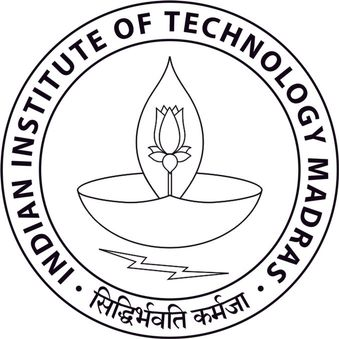
<center>
   # INDIAN INSTITUTE OF TECHNOLOGY MADRAS
   ## ANALYSIS OF KINETIC AND ENERGY PARAMETERS FOR JUMPING

<center>
   ## PROJECT PRESENTATION
   ### ME6230 - MECHANICS OF HUMAN MOVEMENT
    Group Members:
    1. ME15B048 Nikhil S
    2. ME15B044 Akshay M
    3. ME15B079 Abhijeet V
    4. ME15B152 Achraj S
    Mentor: Sourya Varenya

## Problem Statement
- To establish and understand the relation between jump heights and kinetic parameters by experimenting with different heights

## Objective 
- To get a hands-on experience on real time data collection to visualise upper cap on normal human body while jumping

- To predict the kinetic parameter changes required for jumping to a height greater than normal human being’s capability by analysing the existing data 

## Literature Review

<img src="image.png">


## OVERVIEW
<img src="6.png" width="900" align="middle">

## ASSUMPTIONS
- The entire body has been distributed in 5 sections:
 - Upper body
 - Thigh
 - Shank
 - Hindfoot
 - Forefoot
 
- The upper body has been assumed as a lumped mass, concentrated at the center of mass, with a moment of inertia 

- The sections are modelled as rigid links, the data for moment of inertia and center of mass has been taken from the anthropometric data

- The cumulative moment due to muscle forces has been substituted with joint torques

- The foot is modelled into 2 separate sections to conformly analyse the jumping action

- The inverse dynamic analysis has been performed on 4 lower links, upper body is not considered an active element in IDA 

## SEGMENTATION
The lower extremeties have been divided as follows:
- rotary joint at hip
- thigh rod of mass $m_t$ and length $l_t$
- rotary joint at knee
- shank rod of mass $m_s$ and length $l_s$
- rotary joint at ankle
- hindfoot rod of mass $m_h$ and length $l_h$
- rotary joint at metatarsophalangeal joint
- forefoot rod of mass $m_f$ and length $l_f$

# ANTHROPOMETRIC DATA

The Weight, Length, Center of Mass & Moment of Inertia parameters have been determined by the following lumped mass model.


<center>
    <img src="Antropometric data.png" width="1900px">
   

Separate assumptions are taken for the forefoot link.

In [3]:
import limb
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
anthdat=limb.AnthroData(54.5,170)
ls=anthdat[8]/100
lt=anthdat[4]/100
lh=anthdat[16]/100
lf=anthdat[12]/100
lcu=anthdat[1]/100
lcs=anthdat[9]/100
lct=anthdat[5]/100
lch=anthdat[17]/100
lcf=anthdat[13]/100
If=anthdat[14]/10000
Is=anthdat[10]/10000
Ih=anthdat[18]/10000
It=anthdat[6]/10000
Iu=anthdat[2]/10000
mf=anthdat[11]
ms=anthdat[7]
mh=anthdat[15]
mt=anthdat[3]
mu=anthdat[0]

## INVERSE DYNAMIC EQUATIONS

<img src="linkmodel.png" width="600" align="middle" align="top">

### FOREFOOT
<img src="1.png" width="600" align="right" align="top">
     
$R_x + M_x = m_fa_{f_x}$

$R_y + M_y = m_fa_{f_y} + m_fg$

$M_M - R_ycos\theta_fl_f + R_xsin\theta_fl_f + m_fgcos\theta_f(l_{cf}) = (I_f + m_fl^2_{cf})\alpha_f$


## INVERSE DYNAMIC EQUATIONS
### HINDFOOT
<img src="3.png" width="600" align="right" align="top">

$A_x - M_x = m_ha_{h_x}$

$A_y - M_y = m_ha_{h_y} + m_hg$

$M_A + M_ycos\theta_hl_h - M_xsin\theta_hl_h + m_hgcos\theta_h(l_{ch}) - M_M= (I_h + m_hl^2_{ch})\alpha_h$

## INVERSE DYNAMIC EQUATIONS
### SHANK
<img src="4.png" width="600" align="right" align="top">

$K_x - A_x = m_sa_{s_x}$

$K_y - A_y = m_sa_{s_y} + m_sg$

$M_K + A_ycos\theta_sl_s - A_xsin\theta_sl_s + m_sgcos\theta_s(l_{cs}) - M_A= (I_s + m_sl^2_{cs})\alpha_s$

## INVERSE DYNAMIC EQUATIONS
### THIGH
<img src="2.png" width="600" align="right" align="top">

$H_x - K_x = m_ta_{t_x}$

$H_y - K_y = m_ta_{t_y} + m_tg$

$M_H + K_ycos\theta_tl_t - K_xsin\theta_tl_t + m_tgcos\theta_r(l_{ct}) = (I_t + m_tl^2_{ct})\alpha_t$

## MODEL JUSTIFICATION

- Jumping is observed only in the sagittal plane, therefore a 2D model is sufficient to analyse the dynamics
- Both the legs have a symmetric movement while jumping, therefore the need for marker placement on both the legs is dismissed
- The 5th metatarsal-phalangeal joint has a significant movement in jumping compared to walking gait which is why the foot is being modelled as 2 links and not 1 link.
- The upper body movement (upper limbs) and other joints are not allowed a considerable movement during jumping action therefore the upper body was modelled as a single link 


## MARKER PROTOCOL
Active markers were placed on the major joints in accordance with the segmentation:
<img src="fullbody.png" align="right">

#### Torso

<img src="torso.png" width="500"  align="middle">

#### Greater Trochanter (Hip)
<img src="Hip1.png" width="500" align="middle">

#### Lateral Condyle (Knee)
<img src="Knee1.png" width="500" align="middle">

#### Lateral Malleolus (Ankle)
<img src="Ankle1.png" width="500" align="middle">


#### Fifth Metatarsophalangeal joint
<img src="toe1.png" width="900" align="middle">


#### First Tarsal (Big Toe)
<img src="meta1.png" width="400" align="middle">

## SOFTWARE USED
- Bertec - Force Plate data acquisition

- PhaseSpace Motion Capture - Marker data acquisition

- Mokka - Motion Kinematic & Kinetic Analyzer (.c3d to .csv)

## PROCEDURE FOR EACH JUMP
- Calibration of Cameras
- Fixing of Coordinate system
- Fixing of markers on the body
- Setting of Height
- Zeroing of Force Plate
- Start recording for Force Plate and Marker data capture
- Calibration Point - Stomping to recognise start point
- Jump
- Stop recording
- Save and analyse data

## VIDEOS


In [9]:
def Animate(i):
    import limb
    import matplotlib
    import matplotlib.pyplot as plt

    %matplotlib notebook
    from matplotlib import animation
    from matplotlib.animation import FuncAnimation 

    df3 = pd.read_csv('h4Raw.csv')
    df2 = pd.read_csv('h2Raw.csv')
    df1 = pd.read_csv('h0Raw.csv')
    df=[df1,df2,df3]
    Gxp= df[i].loc[:,"M024Y"]
    Gyp= df[i].loc[:,"M024Z"]
    Hxp= df[i].loc[:,"M025Y"]
    Hyp= df[i].loc[:,"M025Z"]
    Kxp= df[i].loc[:,"M026Y"]
    Kyp= df[i].loc[:,"M026Z"]
    Axp= df[i].loc[:,"M027Y"]
    Ayp= df[i].loc[:,"M027Z"]
    Bxp= df[i].loc[:,"M028Y"]
    Byp= df[i].loc[:,"M028Z"]
    Mxp= df[i].loc[:,"M029Y"]
    Myp= df[i].loc[:,"M029Z"]
    Txp= df[i].loc[:,"M030Y"]
    Typ= df[i].loc[:,"M030Z"]

    k=10

    fig1=plt.figure()
    plt.axes(xlim=(-300,1300),ylim=(-100,1500))

    link1,= plt.plot([Gxp[0], Hxp[0] ],[Gyp[0], Hyp[0]],'bo-')
    link2,= plt.plot([Hxp[0], Kxp[0] ],[Hyp[0], Kyp[0]],'bo-')
    link3,= plt.plot([Kxp[0], Axp[0] ],[Kyp[0], Ayp[0]],'bo-')
    link4,= plt.plot([Axp[0], Bxp[0] ],[Ayp[0], Byp[0]],'bo-')
    link5,= plt.plot([Axp[0], Mxp[0] ],[Ayp[0], Myp[0]],'bo-')
    link6,= plt.plot([Bxp[0], Mxp[0] ],[Byp[0], Myp[0]],'bo-')
    link7,= plt.plot([Mxp[0], Txp[0] ],[Myp[0], Typ[0]],'bo-')

    def init1():
        link1.set_data([Gxp[0],Hxp[0]],[Gyp[0], Hyp[0]])
        return link1,

    def init2():
        link2.set_data([Hxp[0],Kxp[0]],[Hyp[0], Kyp[0]])
        return link2,

    def init3():
        link3.set_data([Kxp[0],Axp[0]],[Kyp[0], Ayp[0]])
        return link3,

    def init4():
        link4.set_data([Axp[0],Bxp[0]],[Ayp[0], Byp[0]])
        return link4,

    def init5():
        link5.set_data([Axp[0],Mxp[0]],[Ayp[0], Myp[0]])
        return link5,

    def init6():
        link6.set_data([Bxp[0],Mxp[0]],[Byp[0], Myp[0]])
        return link6,

    def init7():
        link7.set_data([Mxp[0],Txp[0]],[Myp[0], Typ[0]])
        return link7,

    def animate1(i):
        x1=Gxp[i]
        y1=Gyp[i]
        x2=Hxp[i]
        y2=Hyp[i]
        link1.set_data([x1,x2],[y1,y2])
        return link1,

    def animate2(i):
        x1=Hxp[i]
        y1=Hyp[i]
        x2=Kxp[i]
        y2=Kyp[i]
        link2.set_data([x1,x2],[y1,y2])
        return link2,

    def animate3(i):
        x1=Kxp[i]
        y1=Kyp[i]
        x2=Axp[i]
        y2=Ayp[i]
        link3.set_data([x1,x2],[y1,y2])
        return link3,

    def animate4(i):
        x1=Axp[i]
        y1=Ayp[i]
        x2=Bxp[i]
        y2=Byp[i]
        link4.set_data([x1,x2],[y1,y2])
        return link4,

    def animate5(i):
        x1=Axp[i]
        y1=Ayp[i]
        x2=Mxp[i]
        y2=Myp[i]
        link5.set_data([x1,x2],[y1,y2])
        return link5,

    def animate6(i):
        x1=Bxp[i]
        y1=Byp[i]
        x2=Mxp[i]
        y2=Myp[i]
        link6.set_data([x1,x2],[y1,y2])
        return link6,

    def animate7(i):
        x1=Mxp[i]
        y1=Myp[i]
        x2=Txp[i]
        y2=Typ[i]
        link7.set_data([x1,x2],[y1,y2])
        return link7,

    anim1 = animation.FuncAnimation(fig1, animate1, init_func=init1, frames=2000, interval=k, blit=True)
    anim2 = animation.FuncAnimation(fig1, animate2, init_func=init2, frames=2000, interval=k, blit=True)
    anim3 = animation.FuncAnimation(fig1, animate3, init_func=init3, frames=2000, interval=k, blit=True)
    anim4 = animation.FuncAnimation(fig1, animate4, init_func=init4, frames=2000, interval=k, blit=True)
    anim5 = animation.FuncAnimation(fig1, animate5, init_func=init5, frames=2000, interval=k, blit=True)
    anim6 = animation.FuncAnimation(fig1, animate6, init_func=init6, frames=2000, interval=k, blit=True)
    anim7 = animation.FuncAnimation(fig1, animate7, init_func=init7, frames=2000, interval=k, blit=True)
    
    return anim1,anim2,anim3,anim4,anim5,anim6,anim7


## ANIMATION


<IPython.core.display.Javascript object>


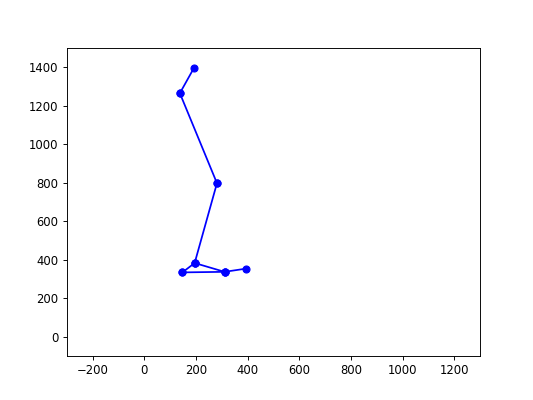

(<matplotlib.animation.FuncAnimation at 0x17c8f15d898>,
 <matplotlib.animation.FuncAnimation at 0x17c911a9400>)

In [10]:
Animate(0)

Traceback (most recent call last):
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_sour

<IPython.core.display.Javascript object>


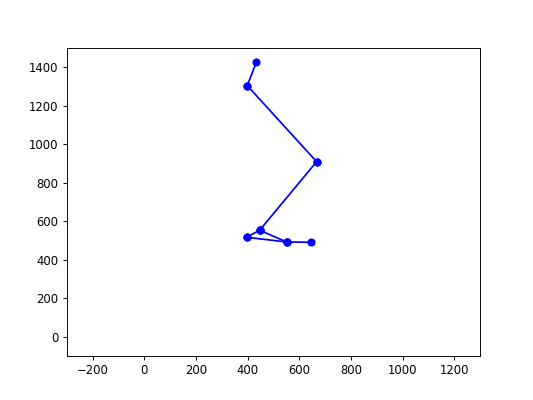

(<matplotlib.animation.FuncAnimation at 0x17c913c1898>,
 <matplotlib.animation.FuncAnimation at 0x17c913c8518>)

In [11]:
Animate(1)

Traceback (most recent call last):
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "c:\users\lenovo\documents\python36\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_sour

<IPython.core.display.Javascript object>


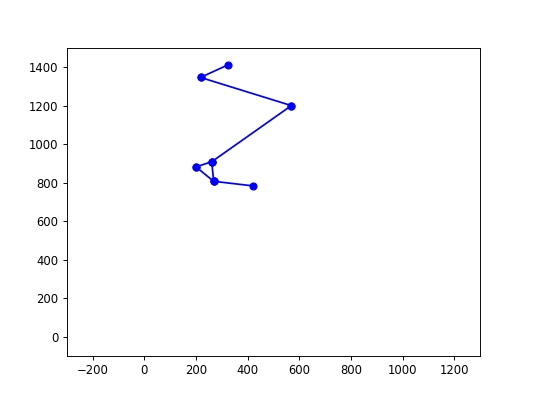

(<matplotlib.animation.FuncAnimation at 0x17c92444400>,
 <matplotlib.animation.FuncAnimation at 0x17c9244c0b8>)

In [12]:
Animate(2)

## FUNCTIONAL BLOCK DIAGRAM OF THE CODE

<img src="5.png" width="650" align="middle">

In [9]:
class BodyPart:
    def __init__(self, length,mass, CoM, Inertia,distal,proximal,time):
        self.time=time
        self.sample=len(distal[0])
        self.length=length
        self.CoM=CoM
        self.mass=mass
        self.Inertia=Inertia
        self.distal=distal
        self.proximal=proximal
        self.ProximForce=[np.zeros(self.sample),np.zeros(self.sample)]
        self.ProximMoment=np.zeros(self.sample)
        self.angle = np.zeros(self.sample)
        self.omega=np.zeros(self.sample)
        self.alpha=np.zeros(self.sample)
        self.velProxim=[np.zeros(self.sample),np.zeros(self.sample)]
        self.accelProxim=[np.zeros(self.sample),np.zeros(self.sample)]
        self.accelCoM=[np.zeros(self.sample),np.zeros(self.sample)]
    def absangle(self):
        unfil=np.zeros(self.sample)
        for i in range(0,self.sample):
            unfil[i]=np.arctan2((self.proximal[1][i]-self.distal[1][i]),(self.proximal[0][i]-self.distal[0][i]))
        self.angle=filterdata(unfil,5)
        return self.angle

    def omega(self): #j1 is joint angle dataframe #n is number of datapoints
        unfil=np.zeros(self.sample)
        BodyPart.absangle(self)
        for i in range(1,self.sample-1):
            unfil[i] = (self.angle[i+1]-self.angle[i-1])/(self.time[i+1]-self.time[i-1])
            self.omega=filterdata(unfil,5)
        return self.omega

    def alpha(self): #j1 is joint angle dataframe #n is number of datapoints 
        BodyPart.omega(self)
        unfil=np.zeros(self.sample)
        for i in range(1,self.sample-1):
            unfil[i] = (self.omega[i+1]-self.omega[i-1])/(self.time[i+1]-self.time[i-1])
            self.alpha=filterdata(unfil,5)
        return self.alpha

    def velProxim(self): #j1 is joint angle dataframe #n is number of datapoints 
        unfil=[np.zeros(self.sample),np.zeros(self.sample)]
        for i in range(1,self.sample-1):
            unfil[0][i] = (self.proximal[0][i+1]-self.proximal[0][i-1])/(self.time[i+1]-self.time[i-1])
            unfil[1][i] = (self.proximal[1][i+1]-self.proximal[1][i-1])/(self.time[i+1]-self.time[i-1])
        self.velProxim[0]=filterdata(unfil[0],5)/1000
        self.velProxim[1]=filterdata(unfil[1],5)/1000
        return self.velProxim
    
    def accelProxim(self): #j1 is joint angle dataframe #n is number of datapoin
        BodyPart.velProxim(self)
        unfil=[np.zeros(self.sample),np.zeros(self.sample)]
        for i in range(1,self.sample-1):
            unfil[0][i] = (self.velProxim[0][i+1]-self.velProxim[0][i-1])/(self.time[i+1]-self.time[i-1])
            unfil[1][i] = (self.velProxim[1][i+1]-self.velProxim[1][i-1])/(self.time[i+1]-self.time[i-1])
        self.accelProxim[0]=filterdata(unfil[0],5)
        self.accelProxim[1]=filterdata(unfil[1],5)
        return self.accelProxim
    
    def accelCoM(self):
        r=self.length-self.CoM
        BodyPart.accelProxim(self)
        BodyPart.alpha(self)
        unfil=[np.zeros(self.sample),np.zeros(self.sample)]
        for i in range(1,self.sample):
            unfil[0][i]=self.accelProxim[0][i]-(r*self.alpha[i]*math.sin(self.angle[i])+self.omega[i]*self.omega[i]*r*math.cos(self.angle[i]))
            unfil[1][i]=self.accelProxim[1][i]+r*self.alpha[i]*math.cos(self.angle[i])-self.omega[i]*self.omega[i]*r*math.sin(self.angle[i])
        self.accelCoM[0]=filterdata(unfil[0],5)
        self.accelCoM[1]=filterdata(unfil[1],5)
        return self.accelCoM    

    def Forces(self,R,M):
        BodyPart.accelCoM(self)
        for i in range(1,self.sample):
            self.ProximForce[0][i]=R[0][i]+self.mass*self.accelCoM[0][i];
            self.ProximForce[1][i]=R[1][i]+self.mass*self.accelCoM[1][i]+self.mass*9.81;
            self.ProximMoment[i]=M[i]+R[0][i]*self.length*math.sin(self.angle[i])-R[1][i]*self.length*math.cos(self.angle[i])-self.mass*9.81*self.CoM*math.cos(self.angle[i])+(self.Inertia+self.mass*self.CoM*self.CoM)*self.alpha[i];
        return  self.ProximForce,self.ProximMoment
    
def Power(omega1,omega2,M):
    Jw=omega2-omega1
    power=np.multiply(Jw,M)
    return power
    
    
def filterdata(y,n):
    from scipy.signal import filtfilt
    b = [1.0 / n] * n
    a = 1
    yy = filtfilt(b,a,y)
    return yy;

def AnthroData(weight,height):
    data=np.zeros(19)
    misc= (7.8*9.6*9.6*49.5)+(46.84*31.6*31.6*50.3)+2*(2.7*16.4*16.4*32.3)+2*(2.7*13.7*13.7*30.3)+2*(0.6*8.2*8.2*29.7) #sum of Icm of all the upper body parts
    data[0]= weight*68.2/100 #weight of UB
    data[1]= height*14.2/100 #height of com of UB from hip 
    data[2]= data[0]*data[1]*data[1]+misc #moment for UB
    data[3]= weight*9.9/100#weight of thigh
    data[4]= height*25.4/100#height of thigh
    data[5]= data[4]*43.3/100#height of com thigh
    data[6]= data[3]*data[4]*data[4]*32.3/100#moment of thigh
    data[7]= weight*4.6/100#weight of shank
    data[8]= height*23.3/100#height of shank
    data[9]= data[8]*43/100 #height of com shank
    data[10]= data[7]*data[8]*data[8]*30.2/100 #moment of shank
    data[11]= weight*(1.4-0.361)/100#weight of foot
    data[12]= height*(11.7-3.53)/100 #height of foot
    data[13]= data[12]*50/100 #height of com foot
    data[14]= data[11]*data[12]*data[12]*47.5/100 #moment of foot
    data[15]=weight*.361/100 #weight of toe
    data[16]=height*3.53/100 #height of toe
    data[17]=data[16]/2 #height of com of toe
    data[18]=data[15]*data[16]*data[16]/12 #moment of toe
    return data

## FILTERING

- _filtfilt_ function from _scipy_

- double low pass filter


<IPython.core.display.Javascript object>


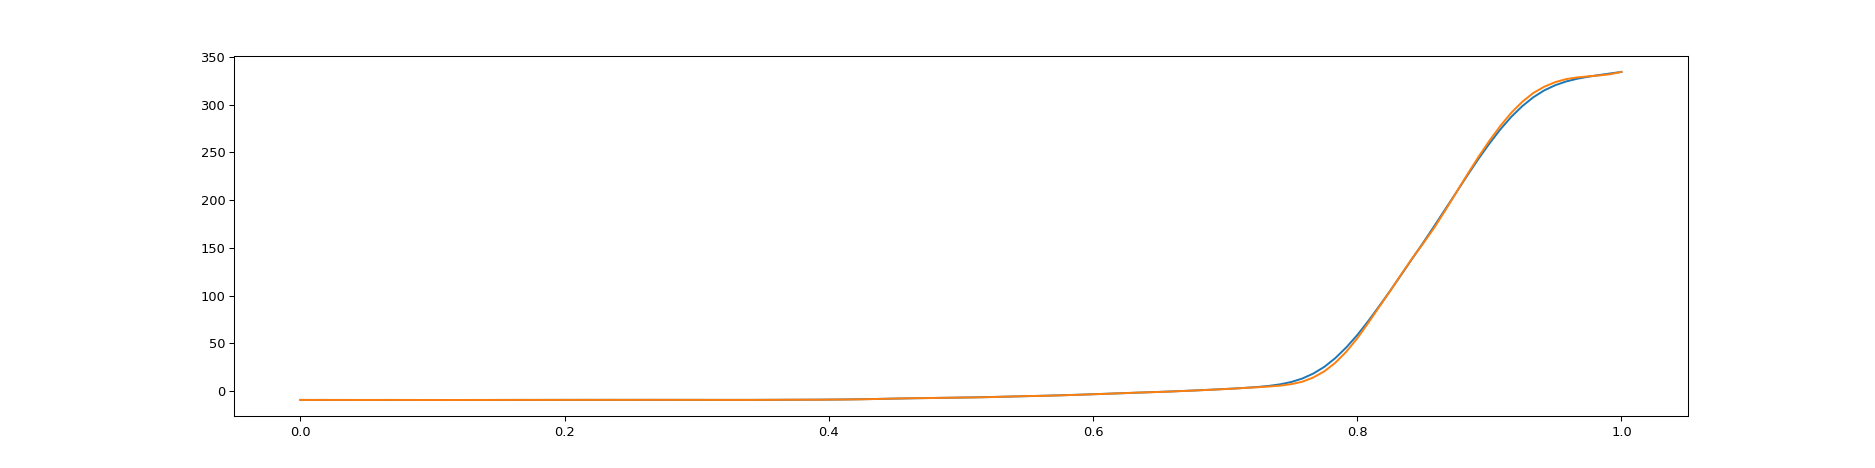

In [304]:
plt.figure(figsize=[20,5])
plt.plot(time[0],limb.filterdata(h0Raw.loc[:,"M028Z"],5)),plt.plot(time[0],h0Raw.loc[:,"M028Z"])
plt.show()


## DATA SYNCHRONIZATION, FRQUENCY MATCHING & LINEAR INTRAPOLATION

<div style="align:center">
<img src="freq.png" width="500" align="middle" style="align:center">
</div>

- Marker data & force plate data generally has a time difference on the absolute time scale
- Stomping is done which gives a reference for synchronization of data
- Marker data is collected at a frequency of 1000Hz while force plate data at 120Hz 
- These two data are mapped with one-to-one correspondence using linear interpolation

## ACQUIRED & PROCESSED DATA



In [5]:
h0Raw=pd.read_csv('h0Raw.csv', sep=',')
h2Raw=pd.read_csv('h2Raw.csv', sep=',')
h4Raw=pd.read_csv('h4Raw.csv', sep=',')

In [6]:
Txp=[h0Raw.loc[:,"M030Y"],h2Raw.loc[:,"M030Y"],h4Raw.loc[:,"M030Y"]]
Typ=[h0Raw.loc[:,"M030Z"],h2Raw.loc[:,"M030Z"],h4Raw.loc[:,"M030Z"]]
Mxp=[h0Raw.loc[:,"M028Y"],h2Raw.loc[:,"M028Y"],h4Raw.loc[:,"M028Y"]]
Myp=[h0Raw.loc[:,"M028Z"],h2Raw.loc[:,"M028Z"],h4Raw.loc[:,"M028Z"]]
Axp=[h0Raw.loc[:,"M027Y"],h2Raw.loc[:,"M027Y"],h4Raw.loc[:,"M027Y"]]
Ayp=[h0Raw.loc[:,"M027Z"],h2Raw.loc[:,"M027Z"],h4Raw.loc[:,"M027Z"]]
Kxp=[h0Raw.loc[:,"M026Y"],h2Raw.loc[:,"M026Y"],h4Raw.loc[:,"M026Y"]]
Kyp=[h0Raw.loc[:,"M026Z"],h2Raw.loc[:,"M026Z"],h4Raw.loc[:,"M026Z"]]
Hxp=[h0Raw.loc[:,"M025Y"],h2Raw.loc[:,"M025Y"],h4Raw.loc[:,"M025Y"]]
Hyp=[h0Raw.loc[:,"M025Z"],h2Raw.loc[:,"M025Z"],h4Raw.loc[:,"M025Z"]]
Gxp=[h0Raw.loc[:,"M024Y"],h2Raw.loc[:,"M024Y"],h4Raw.loc[:,"M024Y"]]
Gyp=[h0Raw.loc[:,"M024Z"],h2Raw.loc[:,"M024Z"],h4Raw.loc[:,"M024Z"]]
time=[h0Raw.loc[:,"Time"],h2Raw.loc[:,"Time"],h4Raw.loc[:,"Time"]]

In [7]:
Hp1=[limb.filterdata(Hxp[0],5),limb.filterdata(Hyp[0],5)]
Hp2=[limb.filterdata(Hxp[1],5),limb.filterdata(Hyp[1],5)]
Hp3=[limb.filterdata(Hxp[2],5),limb.filterdata(Hyp[2],5)]
def Hip():
    plt.subplot(211)
    plt.plot(time[0],Hp1[0]),plt.plot(time[0],Hxp[0])
    plt.title("Hip X")
    plt.ylabel("x(mm)")
    plt.xlabel("t(s)")
    plt.subplot(212)
    plt.plot(time[0],Hp1[1]),plt.plot(time[0],Hyp[0])
    plt.title("Hip Z")
    plt.ylabel("z(mm)")
    plt.xlabel("t(s)")
    plt.show()

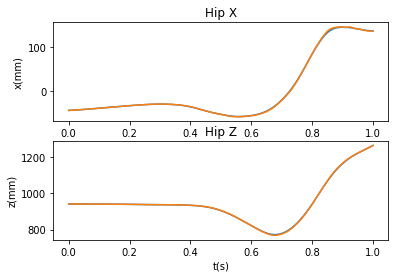

In [8]:
Hip()

In [9]:
Kp1=[limb.filterdata(Kxp[0],5),limb.filterdata(Kyp[0],5)]
Kp2=[limb.filterdata(Kxp[1],5),limb.filterdata(Kyp[1],5)]
Kp3=[limb.filterdata(Kxp[2],5),limb.filterdata(Kyp[2],5)]
def Knee():
    plt.subplot(211)
    plt.plot(time[0],Kp1[0]),plt.plot(time[0],Kxp[0])
    plt.title("Knee X")
    plt.ylabel("x(mm)")
    plt.xlabel("t(s)")
    plt.subplot(212)
    plt.plot(time[0],Kp1[1]),plt.plot(time[0],Kyp[0])
    plt.title("Knee Z")
    plt.ylabel("z(mm)")
    plt.xlabel("t(s)")
    plt.show()

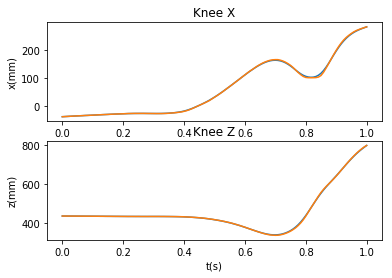

In [10]:
Knee()

In [11]:
Ap1=[limb.filterdata(Axp[0],5),limb.filterdata(Ayp[0],5)]
Ap2=[limb.filterdata(Axp[1],5),limb.filterdata(Ayp[1],5)]
Ap3=[limb.filterdata(Axp[2],5),limb.filterdata(Ayp[2],5)]
def Ankle():
    plt.subplot(211)
    plt.plot(time[0],Ap1[0]),plt.plot(time[0],Axp[0])
    plt.title("Ankle X")
    plt.ylabel("x(mm)")
    plt.xlabel("t(s)")
    plt.subplot(212)
    plt.plot(time[0],Ap1[1]),plt.plot(time[0],Ayp[0])
    plt.title("Ankle Z")
    plt.ylabel("z(mm)")
    plt.xlabel("t(s)")
    plt.show()

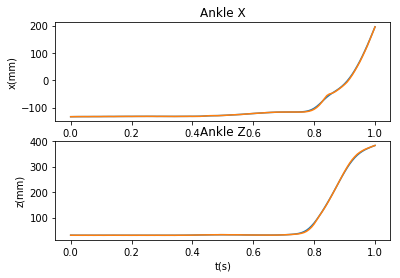

In [12]:
Ankle()

In [13]:
Mp1=[limb.filterdata(Mxp[0],5),limb.filterdata(Myp[0],5)]
Mp2=[limb.filterdata(Mxp[1],5),limb.filterdata(Myp[1],5)]
Mp3=[limb.filterdata(Mxp[2],5),limb.filterdata(Myp[2],5)]
def Metatarsophalangeal_Joint():
    plt.subplot(211)
    plt.plot(time[0],Mp1[0]),plt.plot(time[0],Mxp[0])
    plt.title("Metatarsophalangeal Joint X")
    plt.ylabel("x(mm)")
    plt.xlabel("t(s)")
    plt.subplot(212)
    plt.plot(time[0],Mp1[1]),plt.plot(time[0],Myp[0])
    plt.title("Metatarsophalangeal Joint Z")
    plt.ylabel("z(mm)")
    plt.xlabel("t(s)")
    plt.show()

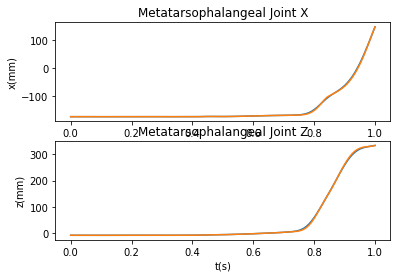

In [14]:
Metatarsophalangeal_Joint()

In [15]:
Tp1=[limb.filterdata(Txp[0],5),limb.filterdata(Typ[0],5)]
Tp2=[limb.filterdata(Txp[1],5),limb.filterdata(Typ[1],5)]
Tp3=[limb.filterdata(Txp[2],5),limb.filterdata(Typ[2],5)]
Gp1=[limb.filterdata(Gxp[0],5),limb.filterdata(Gyp[0],5)]
Gp2=[limb.filterdata(Gxp[1],5),limb.filterdata(Gyp[1],5)]
Gp3=[limb.filterdata(Gxp[2],5),limb.filterdata(Gyp[2],5)]
def Toe():
    plt.subplot(211)
    plt.plot(time[0],Tp1[0]),plt.plot(time[0],Txp[0])
    plt.title("Toe X")
    plt.ylabel("x(mm)")
    plt.xlabel("t(s)")
    plt.subplot(212)
    plt.plot(time[0],Tp1[1]),plt.plot(time[0],Typ[0])
    plt.title("Toe Z")
    plt.ylabel("z(mm)")
    plt.xlabel("t(s)")
    plt.show()

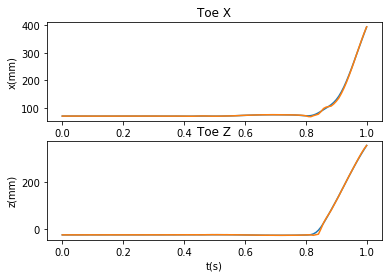

In [16]:
Toe()

In [17]:
GRFdata1=pd.read_csv('h0fp.csv',sep=',')
GRFdata2=pd.read_csv('h2fp.csv',sep=',')
GRFdata3=pd.read_csv('h4fp.csv',sep=',')

In [18]:
Rx=[GRFdata1.loc[:,"Fy"],GRFdata2.loc[:,"Fy"],GRFdata3.loc[:,"Fy"]]
Ry=[-GRFdata1.loc[:,"Fz"],-GRFdata2.loc[:,"Fz"],-GRFdata3.loc[:,"Fz"]]
Rx=[limb.filterdata(Rx[0],2),limb.filterdata(Rx[1],2),limb.filterdata(Rx[2],2)]
Ry=[limb.filterdata(Ry[0],2),limb.filterdata(Ry[1],2),limb.filterdata(Ry[2],2)]
    
def forcePlateData():
    plt.subplot(211)
    plt.plot(time[0],Rx[0],label='height1'), plt.plot(time[1],Rx[1],label='height2'), plt.plot(time[2],Rx[2],label='height3')
    plt.legend(loc=1)
    plt.title("RX")
    plt.ylabel("Force(N)")
    plt.xlabel("t(s)")
    plt.subplot(212)
    plt.plot(time[0],Ry[0],label='height1'),plt.plot(time[1],Ry[1],label='height2'),plt.plot(time[2],Ry[2],label='height3')
    plt.legend(loc=1)
    plt.title("RZ")
    plt.ylabel("Force(N)")
    plt.xlabel("t(s)")
    plt.show()

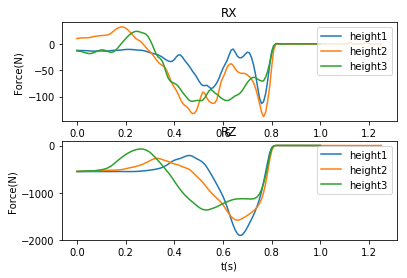

In [19]:
forcePlateData()

## INVERSE DYNAMIC ANALYSIS (IDA)

In [20]:
Body1=[limb.BodyPart(lf,mf,lcf,If,Tp1,Mp1,time[0]),limb.BodyPart(lh,mh,lch,Ih,Mp1,Ap1,time[0]),limb.BodyPart(ls,ms,lcs,Is,Ap1,Kp1,time[0]),limb.BodyPart(lt,mt,lct,It,Kp1,Hp1,time[0]),limb.BodyPart(2*lcu,mu,lcu,Iu,Hp1,Gp1,time[0])]
Body2=[limb.BodyPart(lf,mf,lcf,If,Tp2,Mp2,time[1]),limb.BodyPart(lh,mh,lch,Ih,Mp2,Ap2,time[1]),limb.BodyPart(ls,ms,lcs,Is,Ap2,Kp2,time[1]),limb.BodyPart(lt,mt,lct,It,Kp2,Hp2,time[1]),limb.BodyPart(2*lcu,mu,lcu,Iu,Hp2,Gp2,time[1])]
Body3=[limb.BodyPart(lf,mf,lcf,If,Tp3,Mp3,time[2]),limb.BodyPart(lh,mh,lch,Ih,Mp3,Ap3,time[2]),limb.BodyPart(ls,ms,lcs,Is,Ap3,Kp3,time[2]),limb.BodyPart(lt,mt,lct,It,Kp3,Hp3,time[2]),limb.BodyPart(2*lcu,mu,lcu,Iu,Hp3,Gp3,time[2])]
F1=[Rx[0],Ry[0]]
F2=[Rx[1],Ry[1]]
F3=[Rx[2],Ry[2]]
F=[F1,F2,F3]
T=[np.zeros(874),np.zeros(874),np.zeros(874)]
R=[[[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)]],[[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)]],[[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)]]]
M=[[np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874)]]
Body=[Body1,Body2,Body3]

In [21]:
for j in range(0,3):
    for i in range(0,4):
        F[j],T[j]=Body[j][i].Forces(F[j],T[j])
        R[j][i]=F[j]
        M[j][i]=T[j]

In [22]:
Forefoot=[Body[0][0],Body[1][0],Body[2][0]]
Hindfoot=[Body[0][1],Body[1][1],Body[2][1]]
Shank=[Body[0][2],Body[1][2],Body[2][2]]
Thigh=[Body[0][3],Body[1][3],Body[2][3]]
a1=limb.BodyPart.accelCoM(Body[0][4])
a2=limb.BodyPart.accelCoM(Body[1][4])
a3=limb.BodyPart.accelCoM(Body[2][4])
Ubody=[Body[0][4],Body[1][4],Body[2][4]]

### Joint Angles (Absolute)

#### Angles

In [52]:
def angles():
    H1=Hindfoot[0].angle
    H2=Hindfoot[1].angle
    H3=Hindfoot[2].angle
    plt.figure(figsize=(15,10))
    plt.rc('axes', titlesize=20) 
    plt.rc('axes', labelsize=20) 
    plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=17)
    plt.subplot(311)
    plt.plot(time[0],H1,label='height1'), plt.plot(time[1],H2,label='height2'), plt.plot(time[2],H3,label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("Hindfoot angle") 
    plt.ylabel("angle(rad)")
    plt.xlabel("t(s)")
    S1=Shank[0].angle
    S2=Shank[1].angle
    S3=Shank[2].angle
    plt.subplot(312)
    plt.plot(time[0],S1,label='height1'),plt.plot(time[1],S2,label='height2'),plt.plot(time[2],S3,label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("Shank angle")
    plt.ylabel("angle(rad)")
    plt.xlabel("t(s)")
    T1=Thigh[0].angle
    T2=Thigh[1].angle
    T3=Thigh[2].angle
    plt.subplot(313)
    plt.plot(time[0],T1,label='height1'),plt.plot(time[1],T2,label='height2'),plt.plot(time[2],T3,label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("Thigh angle")
    plt.ylabel("angle(rad)")
    plt.xlabel("t(s)")
    plt.tight_layout()
    plt.show()

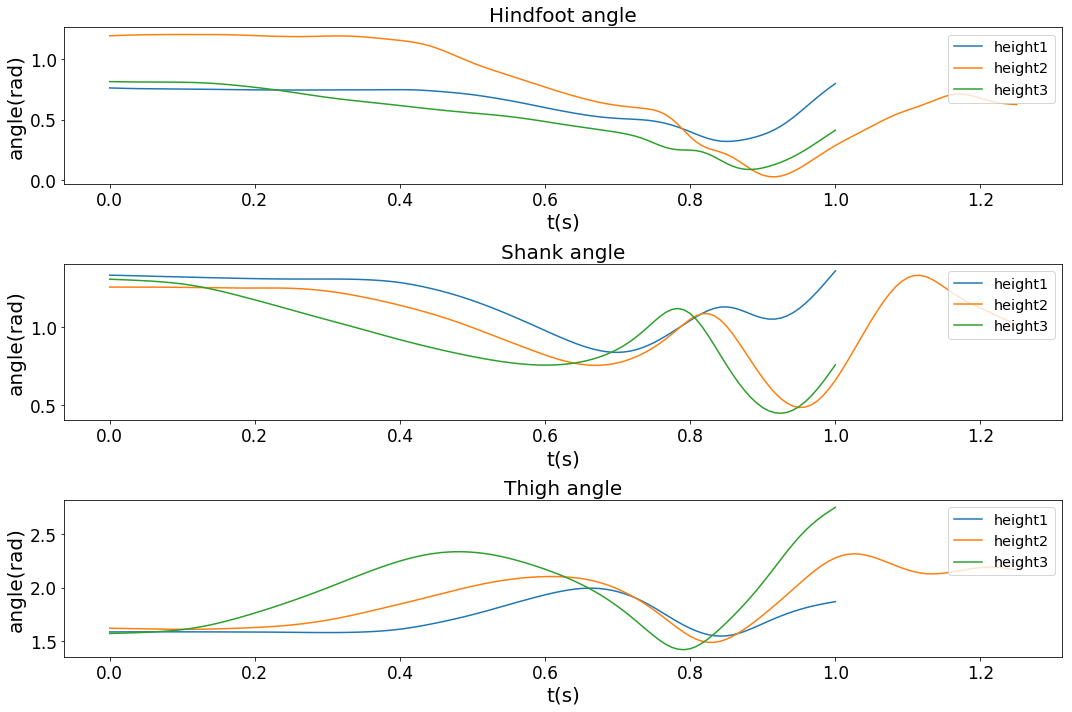

In [53]:
angles()

### Joint Angular Velocities (Absolute)

#### Forefoot

In [56]:
def omegas():
    H1=Hindfoot[0].omega
    H2=Hindfoot[1].omega
    H3=Hindfoot[2].omega
    plt.figure(figsize=(15,10))
    plt.rc('axes', titlesize=20) 
    plt.rc('axes', labelsize=20) 
    plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=17)
    plt.subplot(311)
    plt.plot(time[0],H1,label='height1'), plt.plot(time[1],H2,label='height2'), plt.plot(time[2],H3,label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("Hindfoot angular velocity")
    plt.ylabel("omega (rad/s)")
    plt.xlabel("t(s)")
    S1=Shank[0].omega
    S2=Shank[1].omega
    S3=Shank[2].omega
    plt.subplot(312)
    plt.plot(time[0],S1,label='height1'),plt.plot(time[1],S2,label='height2'),plt.plot(time[2],S3,label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("Shank omega")
    plt.ylabel("omega (rad/s)")
    plt.xlabel("t(s)")
    T1=Thigh[0].omega
    T2=Thigh[1].omega
    T3=Thigh[2].omega
    plt.subplot(313)
    plt.plot(time[0],T1,label='height1'),plt.plot(time[1],T2,label='height2'),plt.plot(time[2],T3,label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("Thigh omega")
    plt.ylabel("omega (rad/s)")
    plt.xlabel("t(s)")
    plt.tight_layout()
    plt.show()

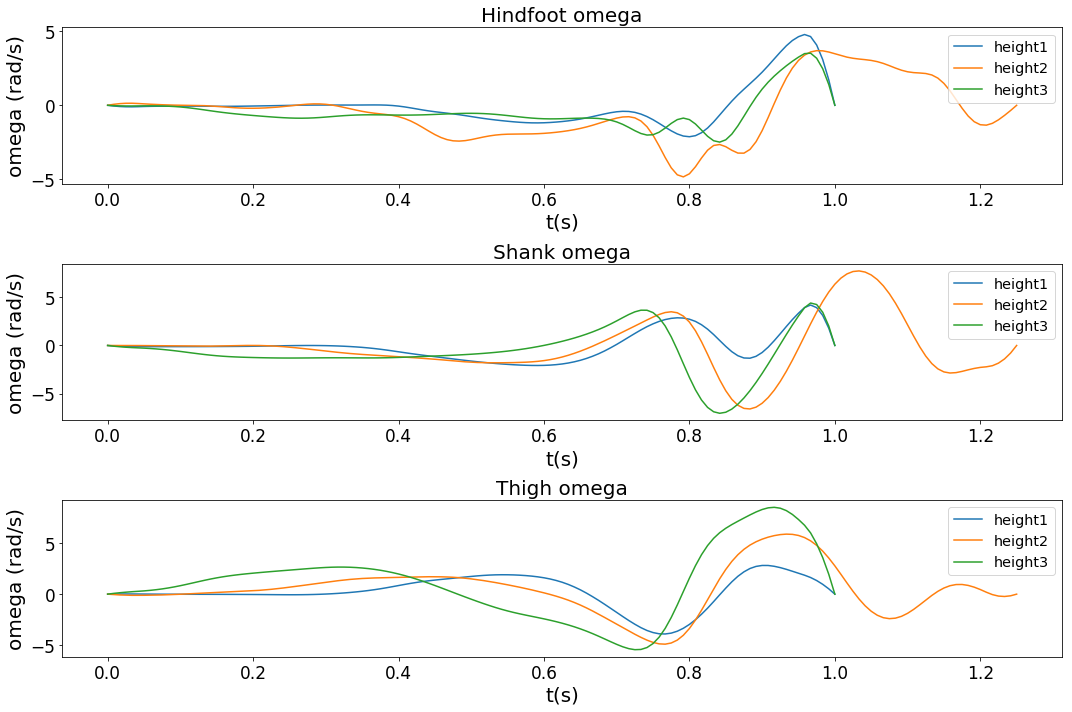

In [57]:
omegas()

### Joint Angular Accelerations (Absolute)

#### Forefoot

In [267]:
def alphas():
    H1=Hindfoot[0].alpha
    H2=Hindfoot[1].alpha
    H3=Hindfoot[2].alpha
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(311)
    plt.plot(time[0],H1,label='height1'), plt.plot(time[1],H2,label='height2'), plt.plot(time[2],H3,label='height3')
    plt.legend(loc=1)
    plt.title("Hindfoot alpha")
    plt.ylabel("alpha (rad/s2)")
    plt.xlabel("t(s)")
    S1=Shank[0].alpha
    S2=Shank[1].alpha
    S3=Shank[2].alpha
    plt.subplot(312)
    plt.plot(time[0],S1,label='height1'),plt.plot(time[1],S2,label='height2'),plt.plot(time[2],S3,label='height3')
    plt.legend(loc=1)
    plt.title("Shank alpha")
    plt.ylabel("alpha (rad/s2)")
    plt.xlabel("t(s)")
    T1=Thigh[0].alpha
    T2=Thigh[1].alpha
    T3=Thigh[2].alpha
    plt.subplot(313)
    plt.plot(time[0],T1,label='height1'),plt.plot(time[1],T2,label='height2'),plt.plot(time[2],T3,label='height3')
    plt.legend(loc=1)
    plt.title("Thigh alpha")
    plt.ylabel("alpha (rad/s2)")
    plt.xlabel("t(s)")
    plt.tight_layout()
    plt.show()

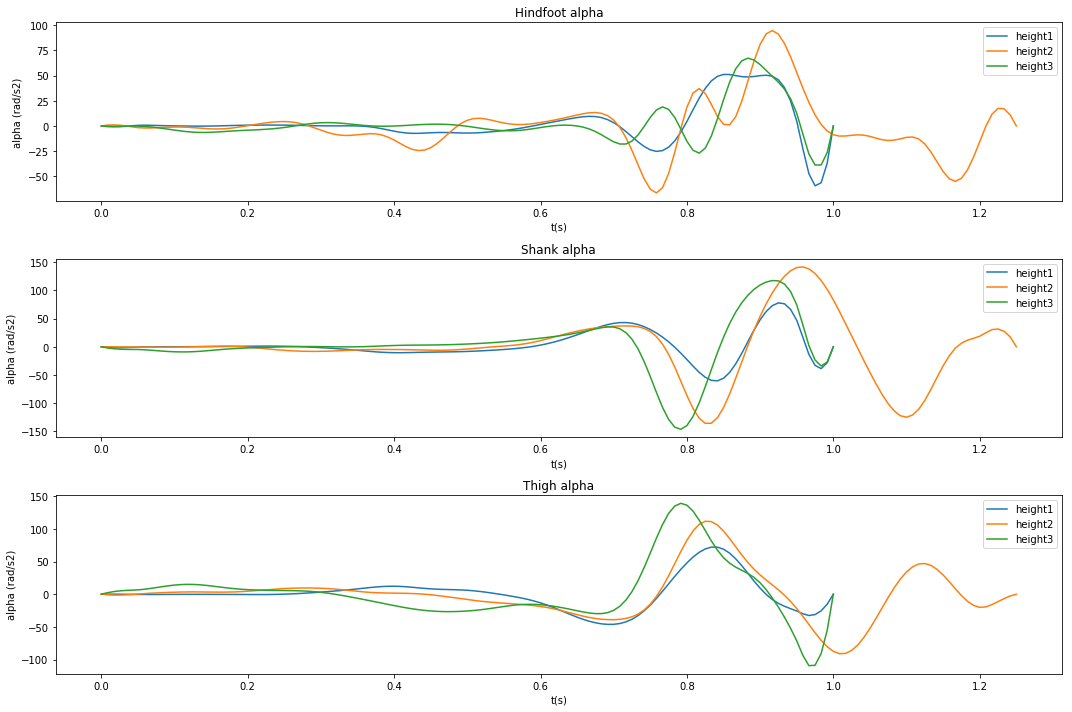

In [268]:
alphas()

### Joint Angles (Relative)

#### Forefoot - Hindfoot

In [58]:
def Jointangles():
    H1=Hindfoot[0].angle
    H2=Hindfoot[1].angle
    H3=Hindfoot[2].angle
    
    G1=Ubody[0].angle
    G2=Ubody[1].angle
    G3=Ubody[2].angle
    
    S1=Shank[0].angle
    S2=Shank[1].angle
    S3=Shank[2].angle
    
    T1=Thigh[0].angle
    T2=Thigh[1].angle
    T3=Thigh[2].angle
    
    plt.figure(figsize=(15,10))
    plt.rc('axes', titlesize=20) 
    plt.rc('axes', labelsize=20) 
    plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=17)
    
    plt.subplot(311)
    plt.plot(time[0],T1-G1,label='height1'), plt.plot(time[1],T2-G2,label='height2'),plt.plot(time[2],T3-G3,label='height3')
    plt.legend(loc=2,fontsize='x-large')
    plt.title("Hip angle")
    plt.ylabel("angle(rad)")
    plt.xlabel("t(s)")
    
    plt.subplot(312)
    plt.plot(time[0],S1-T1,label='height1'),plt.plot(time[1],S2-T2,label='height2'),plt.plot(time[2],S3-T3,label='height3')
    plt.legend(loc=2,fontsize='x-large')
    plt.title("Knee angle")
    plt.ylabel("angle(rad)")
    plt.xlabel("t(s)")
    
    plt.subplot(313)
    plt.plot(time[0],H1-S1,label='height1'),plt.plot(time[1],H2-S2,label='height2'),plt.plot(time[2],H3-S3,label='height3')
    plt.legend(loc=2,fontsize='x-large')
    plt.title("Ankle angle")
    plt.ylabel("angle(rad)")
    plt.xlabel("t(s)")
    plt.tight_layout()
    plt.show()

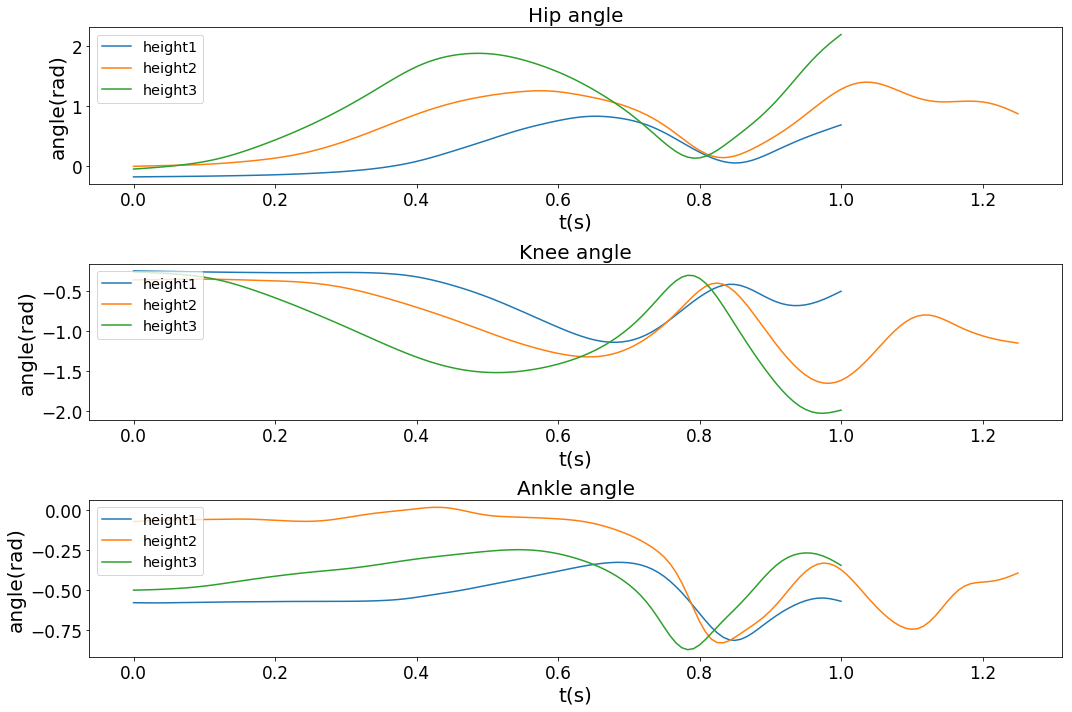

In [59]:
Jointangles()

### Joint Anglular Velocities (Relative)

#### Forefoot - Hindfoot

In [60]:
def Jointomegas():
    H1=Hindfoot[0].omega
    H2=Hindfoot[1].omega
    H3=Hindfoot[2].omega
    
    G1=Ubody[0].omega
    G2=Ubody[1].omega
    G3=Ubody[2].omega
    
    S1=Shank[0].omega
    S2=Shank[1].omega
    S3=Shank[2].omega
    
    T1=Thigh[0].omega
    T2=Thigh[1].omega
    T3=Thigh[2].omega
    
    plt.figure(figsize=(15,10))
    plt.rc('axes', titlesize=20) 
    plt.rc('axes', labelsize=20) 
    plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=17)
    plt.subplot(311)
    plt.plot(time[0],T1-G1,label='height1'), plt.plot(time[1],T2-G2,label='height2'),plt.plot(time[2],T3-G3,label='height3')
    plt.legend(loc=2,fontsize='x-large')
    plt.title("Hip omega")
    plt.ylabel("omega(rad/s)")
    plt.xlabel("t(s)")
    
    plt.subplot(312)
    plt.plot(time[0],S1-T1,label='height1'),plt.plot(time[1],S2-T2,label='height2'),plt.plot(time[2],S3-T3,label='height3')
    plt.legend(loc=2,fontsize='x-large')
    plt.title("Knee omega")
    plt.ylabel("omega(rad/s)")
    plt.xlabel("t(s)")
    
    plt.subplot(313)
    plt.plot(time[0],H1-S1,label='height1'),plt.plot(time[1],H2-S2,label='height2'),plt.plot(time[2],H3-S3,label='height3')
    plt.legend(loc=2,fontsize='x-large')
    plt.title("Ankle omega")
    plt.ylabel("omega(rad/s)")
    plt.xlabel("t(s)")
    plt.tight_layout()
    plt.show()


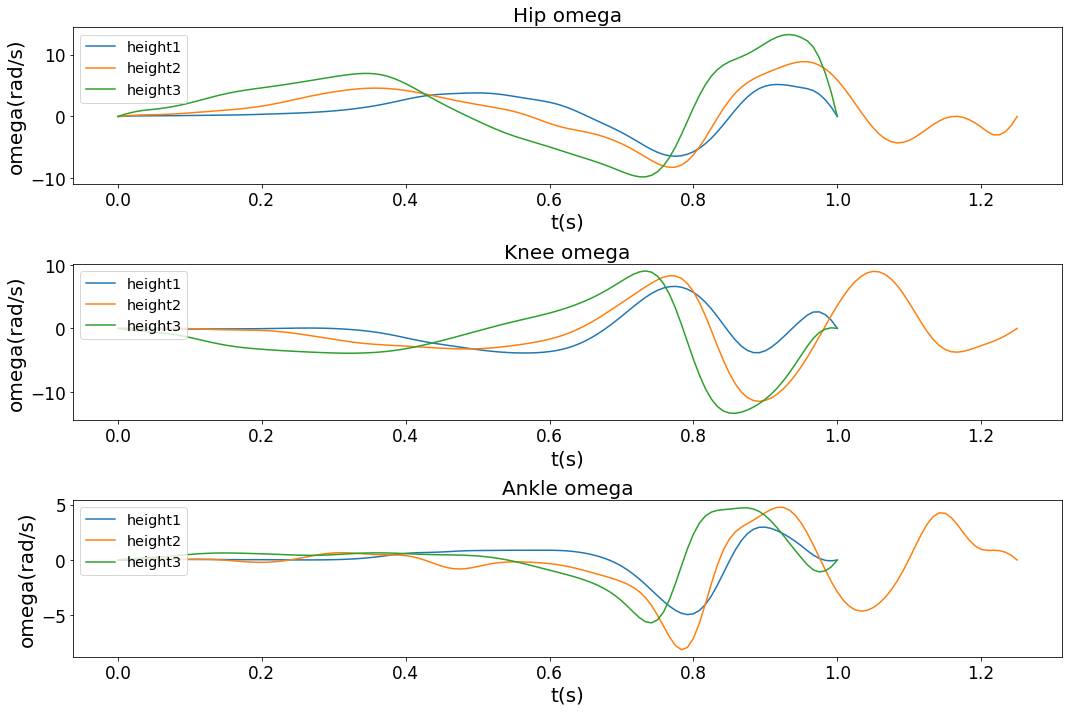

In [61]:
Jointomegas()

### Joint Forces and Moments
#### Metatarsophalangeal Joint

In [92]:
def Forceandmoment(i):
    fig=plt.figure(figsize=(15,10))
    
    plt.subplot(311)
    plt.rc('axes', titlesize=20) 
    plt.rc('axes', labelsize=20) 
    plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=17)
    #plt.legend(loc=1,fontsize='x-large')
    plt.plot(time[0],R[0][i][0],label='height1'), plt.plot(time[1],R[1][i][0],label='height2'), plt.plot(time[2],R[2][i][0],label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("RX")
    plt.ylabel("Force(N)")
    plt.xlabel("t(s)")
    plt.subplot(312)
    plt.plot(time[0],R[0][i][1],label='height1'),plt.plot(time[1],R[1][i][1],label='height2'),plt.plot(time[2],R[2][i][1],label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("RY")
    plt.ylabel("Force(N)")
    plt.xlabel("t(s)")
    plt.subplot(313)
    plt.plot(time[0],M[0][i],label='height1'),plt.plot(time[1],M[1][i],label='height2'),plt.plot(time[2],M[2][i],label='height3')
    plt.legend(loc=1,fontsize='x-large')
    plt.title("M")
    plt.ylabel("Moment(Nm)")
    plt.xlabel("t(s)")
    plt.tight_layout()
    plt.show()

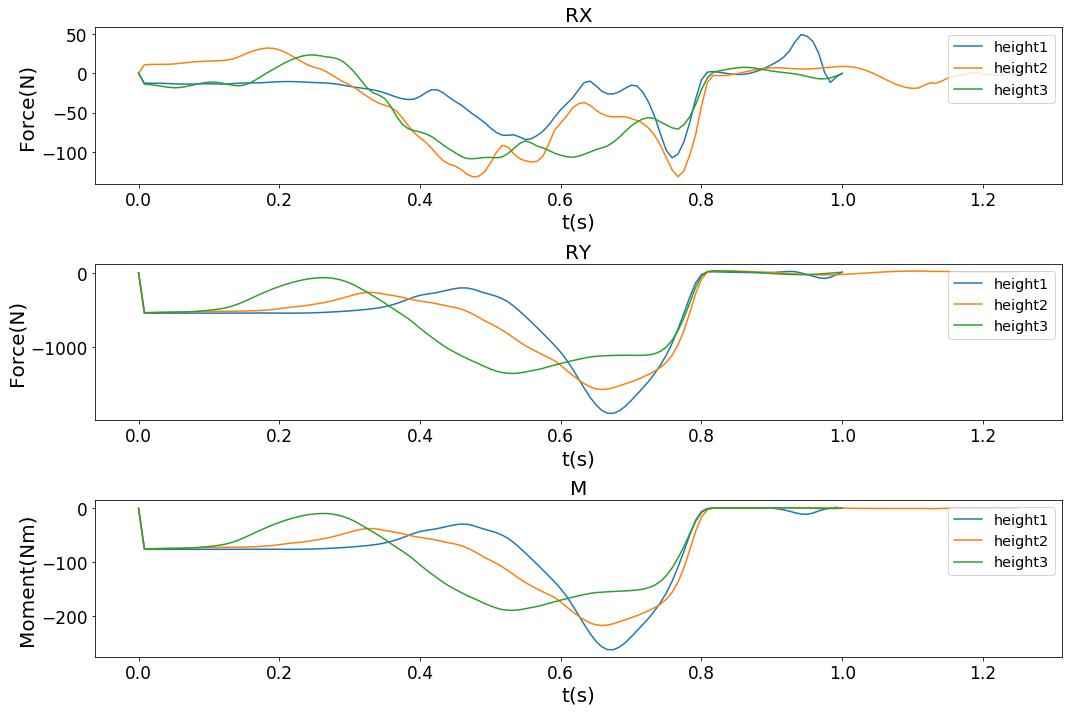

In [93]:
Forceandmoment(0)

#### Ankle Joint

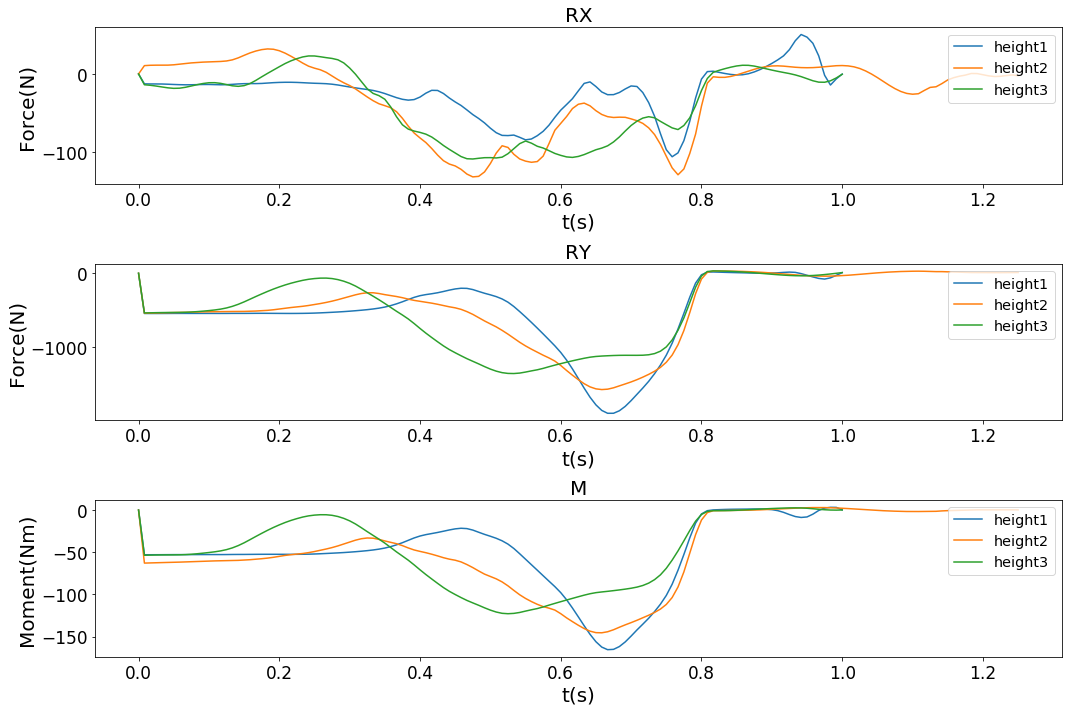

In [64]:
Forceandmoment(1)

#### Knee Joint

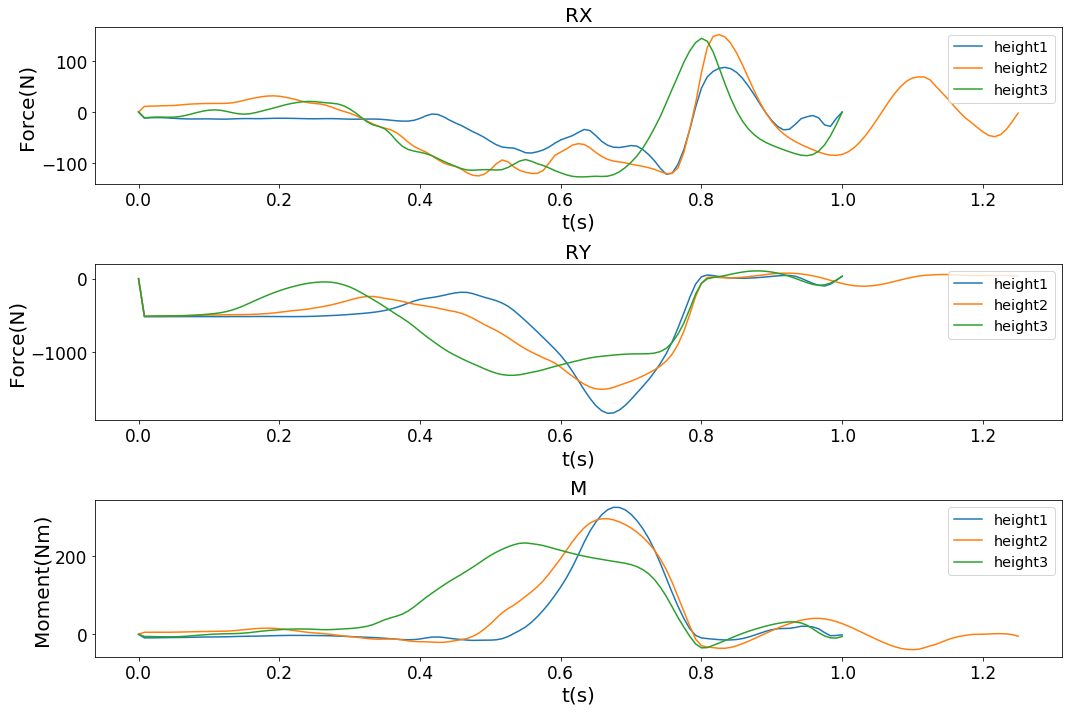

In [65]:
Forceandmoment(2)

#### Hip Joint

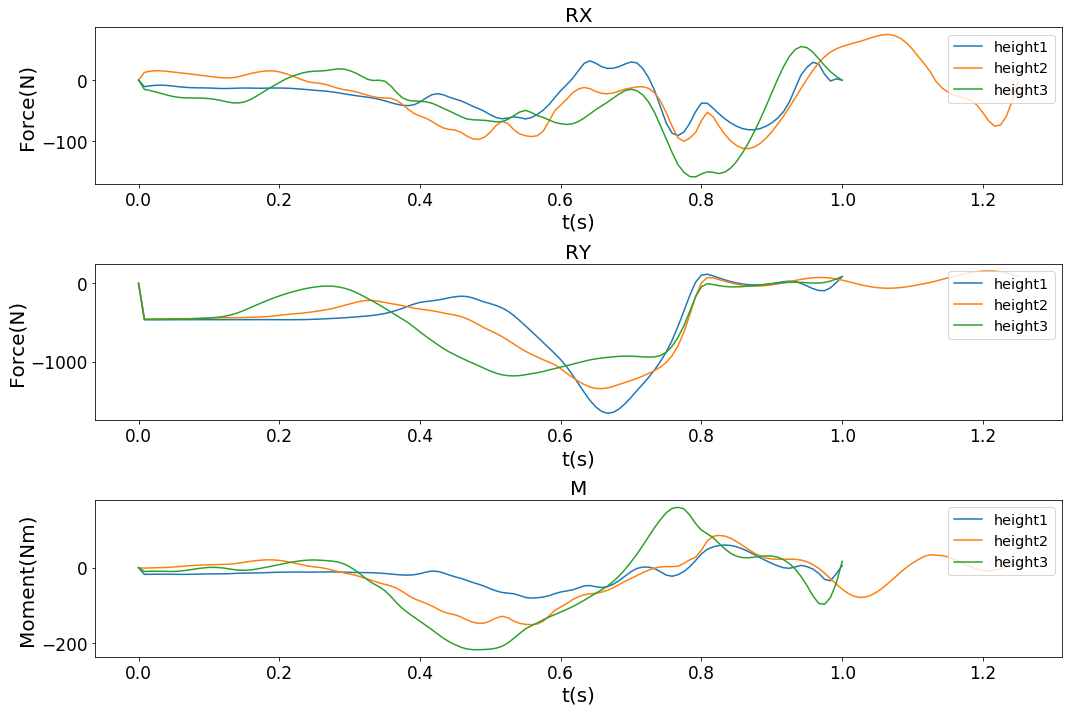

In [66]:
Forceandmoment(3)

### Joint Powers
#### Metatarsophalangeal Joint

In [67]:
def Powers(i):
    Power=[np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874)]
    Power[0]=limb.Power(Body[0][i].omega,Body[0][i+1].omega,M[0][i])
    Power[1]=limb.Power(Body[1][i].omega,Body[1][i+1].omega,M[1][i])
    Power[2]=limb.Power(Body[2][i].omega,Body[2][i+1].omega,M[2][i])
    plt.figure(figsize=(10,5))
    plt.rc('axes', titlesize=20) 
    plt.rc('axes', labelsize=20) 
    plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=17)
    
    plt.plot(time[0],Power[0],label='height1'), plt.plot(time[1],Power[1],label='height2'), plt.plot(time[2],Power[2],label='height3')
    plt.legend(loc=1,fontsize='x-large')
    
    plt.title("Joint Power")
    plt.ylabel("Power(W)")
    plt.xlabel("t(s)")
    plt.show()

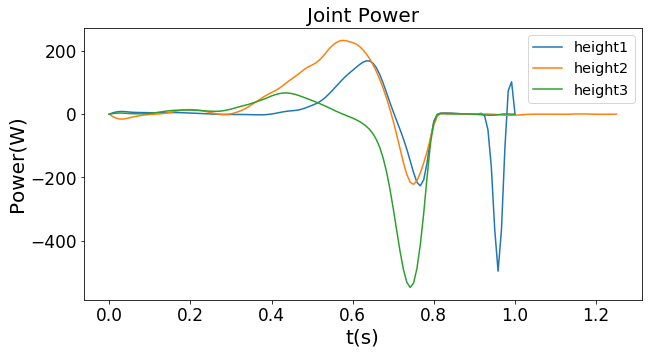

In [68]:
Powers(0)

#### Ankle Joint

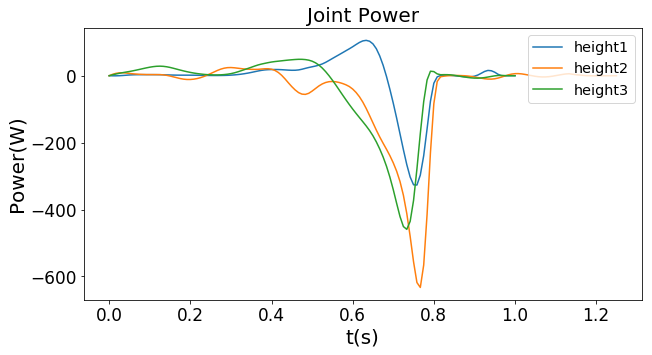

In [69]:
Powers(1)

#### Knee Joint

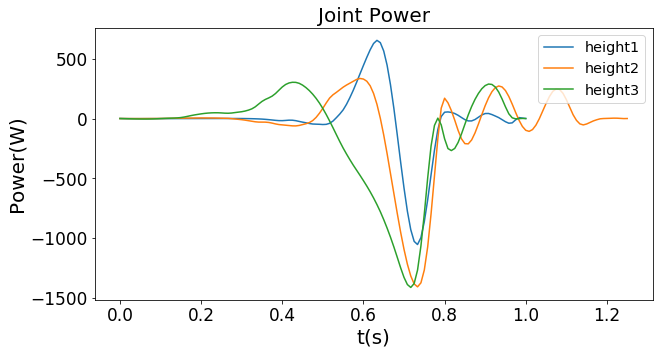

In [94]:
Powers(2)

#### Hip Joint

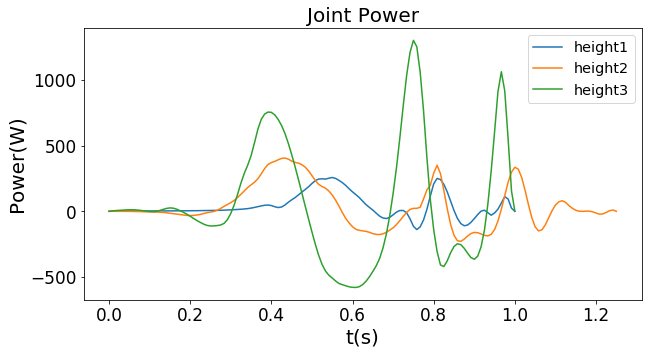

In [95]:
Powers(3)

## LIMITATIONS OF IDA
Inverse dynamics is a very powerful technique for understanding movement, but it does have some inherent limitations:
- It relies on assumptions that are not always valid like joint frictions, lumped masses etc.
- Estimating the joint center of rotation as a hinge is prone to error
- Motion at the skin-bone interface generates error in marker data
- Error propagation (the errors of the distal joint calculations affect those at more proximal calculations)
- It cannot differentiate between different muscles, it can only determine the net moment and power


## ERRORS
- Out of plane movement
- Marker data loss and linear interpolation assumptions
- Deviation in anthropometric data
- Excessive Simplification
- Inaccuracies in co-alignment of the force platform and motion analysis system


## DISCUSSIONS
for Jumping
$\alpha$ times the height,
- After toe off, the whole body (COM) acts as a projectile with an initial velocity which determines the height of jump
- This initial velocity is the result of accelerating from the squat position to total extension
- For jumping heigher, the acceleration of the centre of mass should be increased by $\alpha$ as the increase in height required
- similarly the time from squat to total extension should be decreased by $\sqrt\alpha$
- IDA must be performed for back-calculated values of angles to find required moments and powers

## REFERENCES
- [1] Clinical Gait Analysis, “Inverse Dynamics”, Accessed on April 25, 2018, retrieved from: http://www.clinicalgaitanalysis.com/teach-in/inverse-dynamics.html

- [2] Young-Kwan Kim, Yoon Hyuk Kim- “Intersegmental dynamics of the lower limb in vertical jumps”, 2011, Journal of Mechanical Science and Technology 25 (7), Pg: 1817~1822, DOI: 10.1007/s12206-011-0512-y

- [3] Nicholas P. Linthorne- “Analysis of standing vertical jumps using a force platform”, 2001, American Association of Physics Teachers,  DOI: 10.1119/1.1397460

## RESULTS
Forces for each joint vs the height of jumping
Powers at each joint vs the height of jumping

# Individual Contributions

- ME15B048- Nikhil S: Integration of codes and writing IDA code. subject for experiment.
- ME15B044- Akshay M: Frequncy Mappping, Filtering
- ME15B079- Abhijeet V: Animation, Data Slicing
- ME15B152-Achraj S: Initial Functions and Template


<center>
   # Thank You